# Importing Libraries

In [406]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Reading Dataset

In [409]:
file_path = r"C:\Users\shravya\PycharmProjects\minor\DDOS Dataset.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [411]:
df.shape

(15462150, 26)

In [413]:
print("dataset info:\n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15462150 entries, 0 to 15462149
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   timestamp                 float64
 1   flow_id                   object 
 2   ip_src                    object 
 3   tp_src                    int64  
 4   ip_dst                    object 
 5   tp_dst                    int64  
 6   ip_proto                  int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        float64
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  packet_count              int64  
 12  byte_count                float64
 13  packet_count_per_second   float64
 14  packet_count_per_nsecond  float64
 15  byte_count_per_second     float64
 16  byte_count_per_nsecond    float64
 17  FIN_Flag_Cnt              float64
 18  SYN_Flag_Cnt              float64
 19  RST_Flag_Cnt              float64
 20  PSH_Flag_Cnt          

# Displaying the total number of missing values in each attribute

In [416]:
df.isnull().sum()

timestamp                          0
flow_id                            0
ip_src                             0
tp_src                             0
ip_dst                             0
tp_dst                             0
ip_proto                           0
flow_duration_sec                  0
flow_duration_nsec                 0
idle_timeout                       0
hard_timeout                       0
packet_count                       0
byte_count                         0
packet_count_per_second            0
packet_count_per_nsecond           0
byte_count_per_second          29713
byte_count_per_nsecond         29713
FIN_Flag_Cnt                12794627
SYN_Flag_Cnt                12794627
RST_Flag_Cnt                12794627
PSH_Flag_Cnt                12794627
ACK_Flag_Cnt                12794627
URG_Flag_Cnt                12794627
CWE_Flag_Cnt                12794627
ECE_Flag_Cnt                12794627
label                              0
dtype: int64

In [418]:
df.head(10)

,timestamp,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,flow_duration_sec,flow_duration_nsec,idle_timeout,...,byte_count_per_nsecond,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Cnt,ECE_Flag_Cnt,label
0,1.589933e+09,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,4,480000000.0,20,...,6.981700e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.589933e+09,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,4,486000000.0,20,...,2.435180e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.589933e+09,10.0.0.35424610.0.0.550501,10.0.0.3,54246,10.0.0.5,5050,1,4,484000000.0,20,...,6.074380e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.589933e+09,10.0.0.55424610.0.0.350501,10.0.0.5,54246,10.0.0.3,5050,1,4,415000000.0,20,...,7.084337e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.589933e+09,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,4,423000000.0,20,...,6.950355e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.589933e+09,10.0.0.5010.0.0.301,10.0.0.5,0,10.0.0.3,0,1,4,417000000.0,20,...,7.050360e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.589933e+09,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,14,429000000.0,20,...,2.969697e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,1.589933e+09,10.0.0.5010.0.0.301,10.0.0.5,0,10.0.0.3,0,1,14,423000000.0,20,...,3.011820e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.589933e+09,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,14,486000000.0,20,...,1.893820e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,1.589933e+09,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,14,492000000.0,20,...,6.893538e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Replace infinity values with NaN and drop NaN rows

In [421]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.dropna(inplace=True)

In [423]:
df.shape

(2667523, 26)

In [425]:
df.isnull().sum()

timestamp                   0
flow_id                     0
ip_src                      0
tp_src                      0
ip_dst                      0
tp_dst                      0
ip_proto                    0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
FIN_Flag_Cnt                0
SYN_Flag_Cnt                0
RST_Flag_Cnt                0
PSH_Flag_Cnt                0
ACK_Flag_Cnt                0
URG_Flag_Cnt                0
CWE_Flag_Cnt                0
ECE_Flag_Cnt                0
label                       0
dtype: int64

In [427]:

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


timestamp: 117148 unique values
flow_id: 360073 unique values
ip_src: 245794 unique values
tp_src: 61069 unique values
ip_dst: 18 unique values
tp_dst: 14662 unique values
ip_proto: 3 unique values
flow_duration_sec: 101 unique values
flow_duration_nsec: 1000 unique values
idle_timeout: 1 unique values
hard_timeout: 1 unique values
packet_count: 46872 unique values
byte_count: 66495 unique values
packet_count_per_second: 91090 unique values
packet_count_per_nsecond: 290464 unique values
byte_count_per_second: 108285 unique values
byte_count_per_nsecond: 310368 unique values
FIN_Flag_Cnt: 1 unique values
SYN_Flag_Cnt: 1 unique values
RST_Flag_Cnt: 1 unique values
PSH_Flag_Cnt: 1 unique values
ACK_Flag_Cnt: 1 unique values
URG_Flag_Cnt: 1 unique values
CWE_Flag_Cnt: 1 unique values
ECE_Flag_Cnt: 1 unique values
label: 2 unique values


# Scaling Data

In [429]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Encoding Non-Numeric Columns

In [437]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import FeatureHasher

constant_columns = [col for col in df.columns if df[col].nunique() == 1]
if constant_columns:
    print(f"\nDropping constant columns: {constant_columns}")
    df.drop(columns=constant_columns, inplace=True)


categorical_cols = ['flow_id', 'ip_src', 'ip_dst']
low_cardinality_cols = ['ip_dst']  
high_cardinality_cols = ['flow_id', 'ip_src']  


existing_low_cardinality_cols = [col for col in low_cardinality_cols if col in df.columns]
existing_high_cardinality_cols = [col for col in high_cardinality_cols if col in df.columns]



In [439]:

if existing_high_cardinality_cols:
    hasher = FeatureHasher(n_features=5, input_type='string')  # Hash to 5 features
    
    # Convert to string and create list per row
    hashed_features = hasher.transform(df[existing_high_cardinality_cols].astype(str).values).toarray()
    
    # Create DataFrame for hashed features
    df_hashed = pd.DataFrame(hashed_features, columns=[f'hash_{i}' for i in range(5)])
    
    # Drop original high-cardinality columns
    df.drop(columns=existing_high_cardinality_cols, inplace=True)
    
    # Concatenate hashed features to dataset
    df = pd.concat([df, df_hashed], axis=1)
    
    print(f"\n Applied Feature Hashing to {existing_high_cardinality_cols}")
else:
    print("\n No high-cardinality categorical columns found in dataset.")




 No high-cardinality categorical columns found in dataset.


# One-Hot Encoding for low-cardinality categorical features

In [445]:


if existing_low_cardinality_cols:
    df = pd.get_dummies(df, columns=existing_low_cardinality_cols, drop_first=True)
    print(f"\nApplied One-Hot Encoding to {existing_low_cardinality_cols}")



In [447]:
#  Prepare data for correlation
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'label' in numeric_cols:
    numeric_cols.remove('label')  # Exclude target column

# Scale numeric data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)



# Computing correlation with target

In [451]:

if 'label' in df.columns:
    correlation_with_target = df_scaled.corrwith(df['label']).dropna()
else:
    raise ValueError("Target column 'label' not found in dataset.")



 # Feature Selection Based on Correlation,Dropping Features With Correlation<0.1


 Selected Features (Correlation ≥ 0.1):
['timestamp', 'tp_dst', 'ip_proto', 'flow_duration_sec', 'packet_count', 'byte_count', 'packet_count_per_second', 'byte_count_per_second', 'hash_1']

Dropped Features (Correlation < 0.1) (REMOVED FROM DATASET):
[]


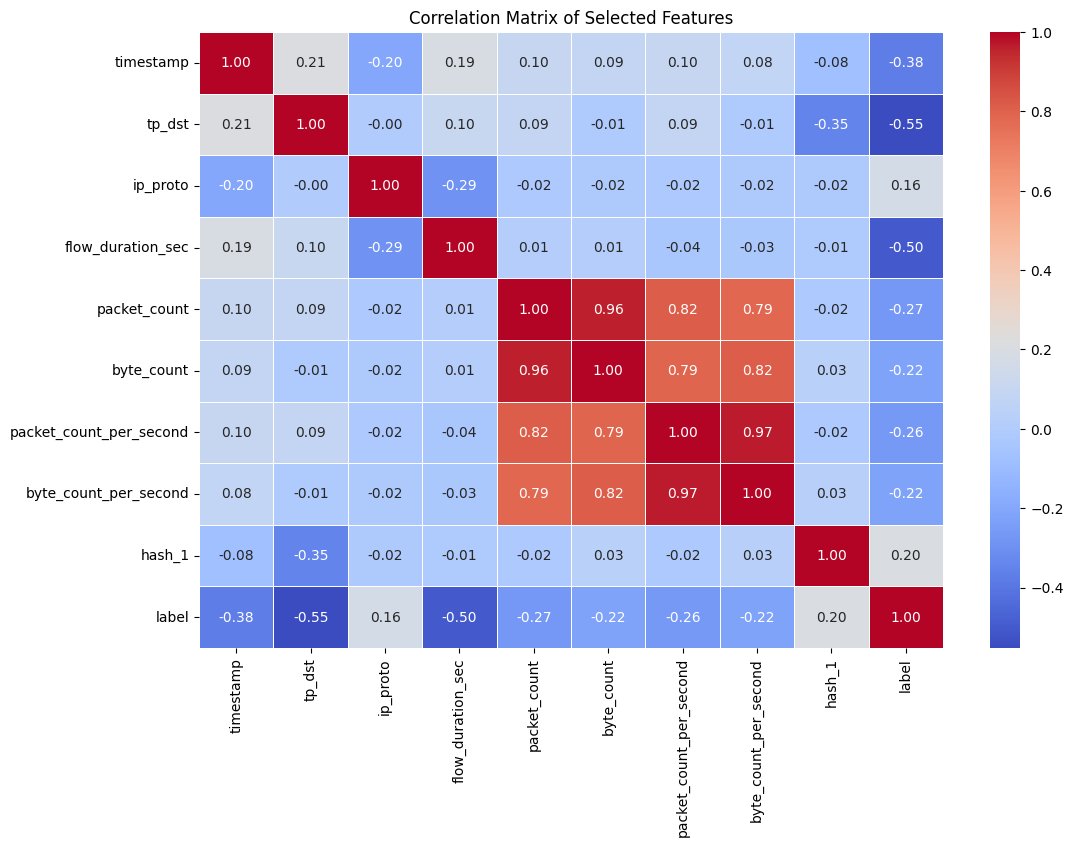


Final dataset shape after feature selection: (2667523, 10)

Final column names after feature selection:
['timestamp', 'tp_dst', 'ip_proto', 'flow_duration_sec', 'packet_count', 'byte_count', 'packet_count_per_second', 'byte_count_per_second', 'hash_1', 'label']


In [458]:

correlation_threshold = 0.1
selected_features = correlation_with_target[abs(correlation_with_target) >= correlation_threshold].index.tolist()
dropped_features = correlation_with_target[abs(correlation_with_target) < correlation_threshold].index.tolist()

# Drop features with correlation < 0.1 from the dataset
df = df[selected_features + ['label']]


print("\n Selected Features (Correlation ≥ 0.1):")
print(selected_features)

print("\nDropped Features (Correlation < 0.1) (REMOVED FROM DATASET):")
print(dropped_features)
if len(df.columns) > 1:
    correlation_matrix = df.corr()

    # Plot heatmap of correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Selected Features")
    plt.show()

# Print final dataset shape and verify column count
print(f"\nFinal dataset shape after feature selection: {df.shape}")
print("\nFinal column names after feature selection:")
print(df.columns.tolist())


In [189]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

timestamp: 117148 unique values
tp_dst: 14662 unique values
ip_proto: 3 unique values
flow_duration_sec: 101 unique values
packet_count: 46872 unique values
byte_count: 66495 unique values
packet_count_per_second: 91090 unique values
byte_count_per_second: 108285 unique values
hash_1: 5 unique values
label: 2 unique values


# Randomize dataset shuffles the dataset to remove order bias

In [193]:
df=shuffle(df,random_state=42)  
print("Dataset randomized")

Dataset randomized


In [195]:
df.head(10)

,timestamp,tp_dst,ip_proto,flow_duration_sec,packet_count,byte_count,packet_count_per_second,byte_count_per_second,hash_1,label
2157704,1.590073e+09,80,6,5,0,0.0,0.00,0.0,0.0,1
2665486,1.590163e+09,53034,6,16,4,584.0,0.25,36.5,0.0,0
631326,1.589963e+09,0,17,12,0,0.0,0.00,0.0,-1.0,1
1937885,1.590072e+09,0,1,4,0,0.0,0.00,0.0,0.0,1
467037,1.589963e+09,0,17,13,0,0.0,0.00,0.0,0.0,1
1519383,1.590011e+09,80,6,11,0,0.0,0.00,0.0,0.0,1
2156583,1.590073e+09,80,6,10,0,0.0,0.00,0.0,0.0,1
1999545,1.590072e+09,0,1,15,0,0.0,0.00,0.0,0.0,1
556431,1.589963e+09,0,17,2,0,0.0,0.00,0.0,0.0,1
961335,1.590010e+09,0,1,13,0,0.0,0.00,0.0,0.0,1


In [197]:
df.tail(10)

,timestamp,tp_dst,ip_proto,flow_duration_sec,packet_count,byte_count,packet_count_per_second,byte_count_per_second,hash_1,label
1136074,1.590010e+09,0,17,10,0,0.0,0.000000,0.000000,0.0,1
2003274,1.590072e+09,0,1,15,0,0.0,0.000000,0.000000,0.0,1
1570006,1.590011e+09,80,6,9,0,0.0,0.000000,0.000000,0.0,1
2234489,1.590073e+09,80,6,8,0,0.0,0.000000,0.000000,0.0,1
732180,1.589982e+09,51938,6,15,120277,7938462.0,8018.466667,529230.800000,-1.0,0
110268,1.589959e+09,49024,6,8,115932,7651968.0,14491.500000,956496.000000,-1.0,0
1692743,1.590014e+09,0,1,46,45,4410.0,0.978261,95.869565,0.0,0
2356330,1.590088e+09,34486,6,15,4,584.0,0.266667,38.933333,-1.0,0
2229084,1.590073e+09,80,6,11,0,0.0,0.000000,0.000000,1.0,1
2219110,1.590073e+09,80,6,17,0,0.0,0.000000,0.000000,0.0,1


# Seperating target attribute

In [200]:
X=df.drop(columns=['label']).values
y=df['label'].values

In [203]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

timestamp: 117148 unique values
tp_dst: 14662 unique values
ip_proto: 3 unique values
flow_duration_sec: 101 unique values
packet_count: 46872 unique values
byte_count: 66495 unique values
packet_count_per_second: 91090 unique values
byte_count_per_second: 108285 unique values
hash_1: 5 unique values
label: 2 unique values


# Split dataset into training and test sets

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y,test_size=0.2,random_state=42)

In [208]:
print(f"Data cleaned & processed Training samples:{X_train.shape[0]},Testing samples:{X_test.shape[0]}")

Data cleaned & processed Training samples:2134018,Testing samples:533505


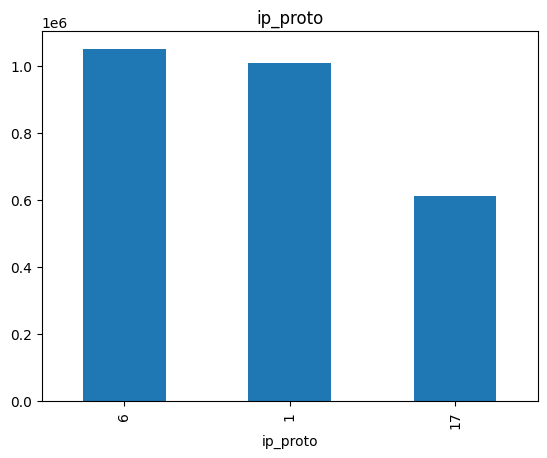

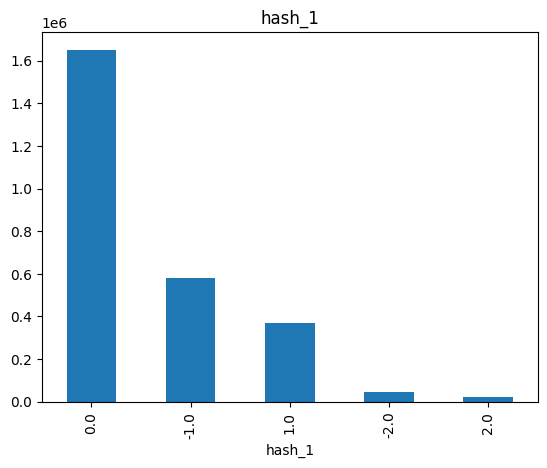

In [210]:
import matplotlib.pyplot as plt
for col in df.columns.drop('label'):
    if df[col].nunique() < 20: 
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

label                      1.000000
hash_1                     0.202975
ip_proto                   0.164321
byte_count_per_second     -0.219515
byte_count                -0.223873
packet_count_per_second   -0.264820
packet_count              -0.267989
timestamp                 -0.375314
flow_duration_sec         -0.499979
tp_dst                    -0.552075
Name: label, dtype: float64


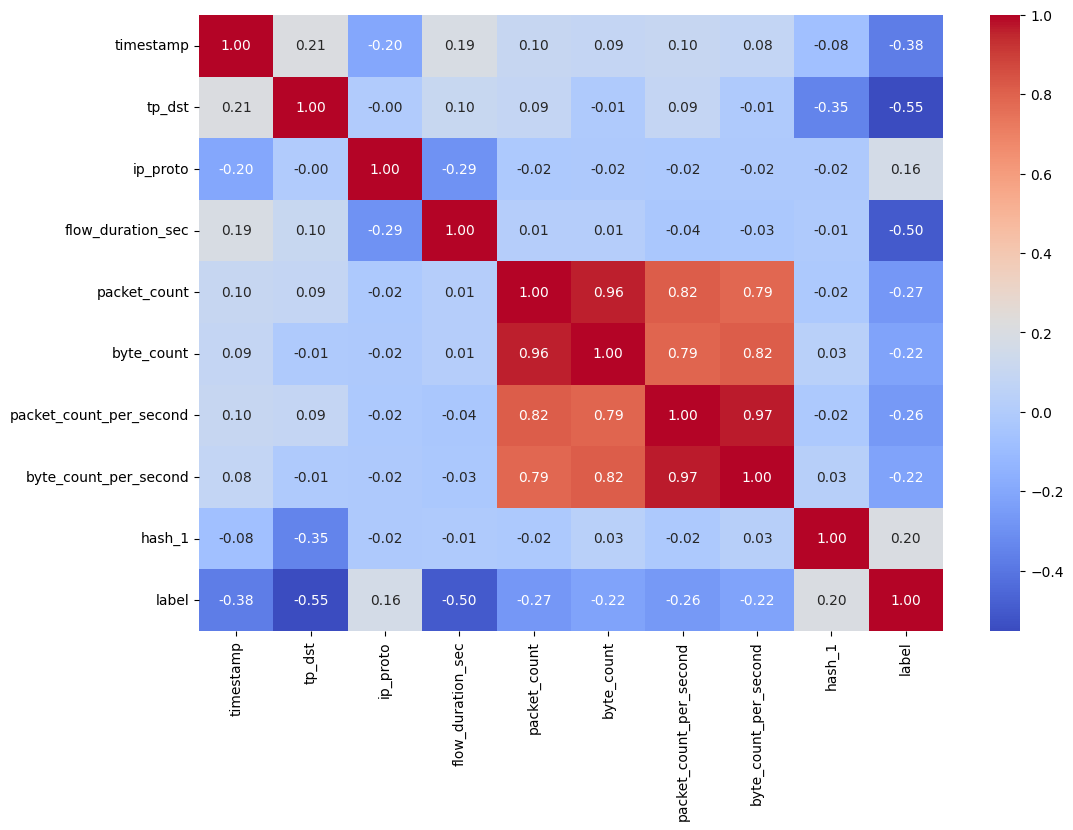

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
corr = df.corr()
# Correlation with target
print(corr['label'].sort_values(ascending=False))
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [214]:
df.shape

(2667523, 10)

In [216]:
df.head()

,timestamp,tp_dst,ip_proto,flow_duration_sec,packet_count,byte_count,packet_count_per_second,byte_count_per_second,hash_1,label
2157704,1.590073e+09,80,6,5,0,0.0,0.00,0.0,0.0,1
2665486,1.590163e+09,53034,6,16,4,584.0,0.25,36.5,0.0,0
631326,1.589963e+09,0,17,12,0,0.0,0.00,0.0,-1.0,1
1937885,1.590072e+09,0,1,4,0,0.0,0.00,0.0,0.0,1
467037,1.589963e+09,0,17,13,0,0.0,0.00,0.0,0.0,1


# ANN(Artificial Neural Network) 

In [219]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the model

In [275]:
from tensorflow.keras.regularizers import l2
# Define a less complex model with stronger regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.02)),  # Less neurons, stronger L2
    Dropout(0.6),  # Increased dropout
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.02)),
    Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\shravya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model

In [280]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Reduce learning rate
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Printing model summary

In [283]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [290]:
history = model.fit(
    X_train, y_train,
    epochs=5,  # More epochs for stable learning
    batch_size=256,  # Increased batch size to smooth training
    validation_data=(X_test, y_test)
)

Epoch 1/5
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9771 - loss: 0.1277 - precision: 0.9667 - recall: 0.9998 - val_accuracy: 0.9819 - val_loss: 0.1137 - val_precision: 0.9734 - val_recall: 1.0000
Epoch 2/5
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9774 - loss: 0.1260 - precision: 0.9671 - recall: 0.9998 - val_accuracy: 0.9818 - val_loss: 0.1123 - val_precision: 0.9732 - val_recall: 1.0000
Epoch 3/5
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9774 - loss: 0.1250 - precision: 0.9671 - recall: 0.9998 - val_accuracy: 0.9842 - val_loss: 0.1172 - val_precision: 0.9766 - val_recall: 1.0000
Epoch 4/5
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9778 - loss: 0.1236 - precision: 0.9677 - recall: 0.9997 - val_accuracy: 0.9806 - val_loss: 0.1116 - val_precision: 0.9715 - val_recall: 1.0000
Epoch 5/5
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9781 - loss: 0.1219 - precision: 0.9680 - recall: 0.9998 - val_accuracy: 0.9810 - va

# Evaluating model on test datset

In [292]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:1.4f}")
print(f"Test Recall: {recall:.4f}")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 13s 766us/step - accuracy: 0.9813 - loss: 0.1089 - precision: 0.9724 - recall: 1.0000
Test Loss: 0.1096
Test Accuracy: 0.9810
Test Precision: 0.9720
Test Recall: 1.0000


In [294]:
from sklearn.metrics import accuracy_score

y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ann)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 9s 527us/step
Test Accuracy: 98.10%


# Computing Confusion Matrix

In [297]:
conf_matrix = confusion_matrix(y_test, y_pred_ann)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[171118  10156]
 [     4 352227]]


# Visualizing Confusion Matrix

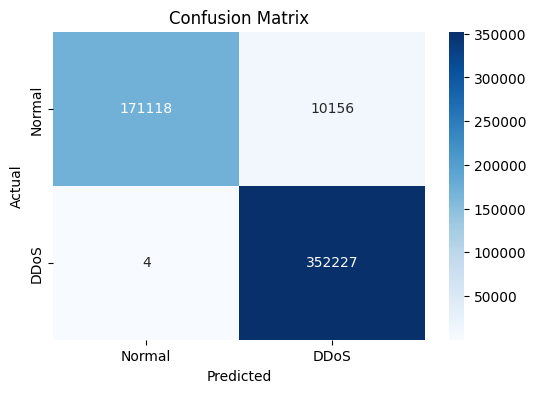

In [300]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [302]:
#  classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    181274
           1       0.97      1.00      0.99    352231

    accuracy                           0.98    533505
   macro avg       0.99      0.97      0.98    533505
weighted avg       0.98      0.98      0.98    533505



Text(0.5, 1.0, 'Accuracy Over Epochs')

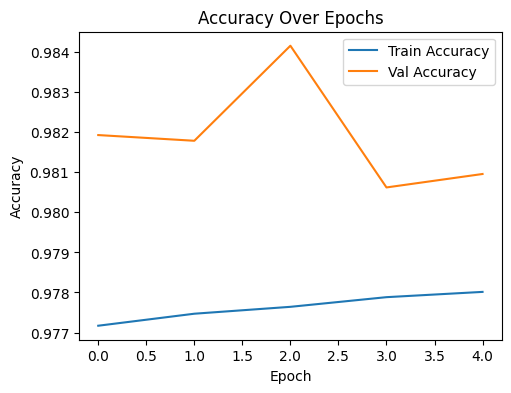

In [304]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

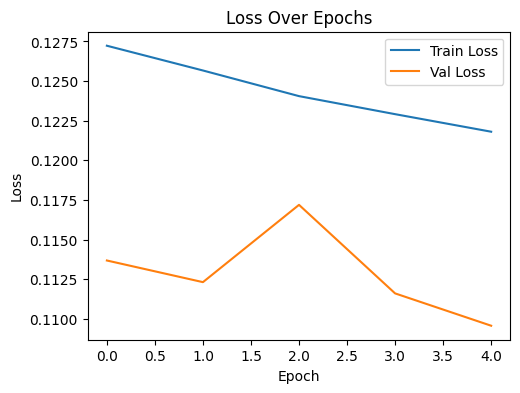

In [306]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [308]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred_ann)
print(f"Test Log Loss: {logloss:.4f}")

Test Log Loss: 0.6864


# Computing ROC-AUC score and plotting the curve

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 9s 543us/step
Test ROC-AUC Score: 0.9955


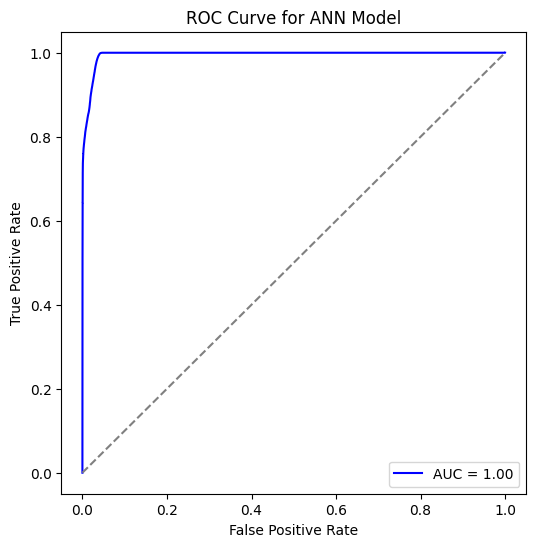

In [311]:
from sklearn.metrics import roc_auc_score, roc_curve
# Generate predictions for ROC-AUC
y_pred_ann = model.predict(X_test).ravel()  # Get probabilities, flatten to 1D

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_ann)
print(f"Test ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN Model')
plt.legend(loc="lower right")
plt.show()

# LSTM(Long Short Term Memory)

In [314]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split

# Reshaping data for LSTM 

In [317]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))



# Creating LSTM model


In [320]:
# LSTM Model (Constrained for ~92% accuracy)
model_lstm = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.5),  
    LSTM(units=32, return_sequences=True),
    Dropout(0.5),
    LSTM(units=16, return_sequences=False),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\shravya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compiling the model

In [323]:
# Compile with SGD (slower learning)
model_lstm.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),  # Slower optimizer
    metrics=['accuracy']
)

# Printing model summary

In [326]:
model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 1, 64)          │        25,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,185 (160.88 KB)

 Trainable params: 41,185 (160.88 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [331]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train model (Should max out around ~92%)
lstm = model_lstm.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=5,  
    batch_size=64,  # Smaller batch size adds randomness
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
26676/26676 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.8421 - loss: 0.3644 - val_accuracy: 0.9562 - val_loss: 0.1367
Epoch 2/5
26676/26676 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9534 - loss: 0.1498 - val_accuracy: 0.9780 - val_loss: 0.0801
Epoch 3/5
26676/26676 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9710 - loss: 0.1051 - val_accuracy: 0.9799 - val_loss: 0.0728
Epoch 4/5
26676/26676 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9756 - loss: 0.0911 - val_accuracy: 0.9815 - val_loss: 0.0675
Epoch 5/5
26676/26676 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9775 - loss: 0.0836 - val_accuracy: 0.9828 - val_loss: 0.0633


In [391]:
# Reshape X_test for LSTM (Ensure it's 3D)
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Evaluate LSTM model
loss, accuracy = model_lstm.evaluate(X_test_lstm, y_test)

# Print evaluation metrics
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



16673/16673 ━━━━━━━━━━━━━━━━━━━━ 14s 853us/step - accuracy: 0.9834 - loss: 0.0618
Test Loss: 0.0624
Test Accuracy: 0.9831


# Evaluating model on test dataset

In [334]:
test_loss, test_accuracy = model_lstm.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 14s 853us/step - accuracy: 0.9834 - loss: 0.0618
Test Loss: 0.0624
Test Accuracy: 0.9831


In [338]:
from sklearn.metrics import accuracy_score

y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lstm)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 14s 845us/step
Test Accuracy: 98.31%


# Computing Confusion Matrix

In [341]:
conf_matrix = confusion_matrix(y_test, y_pred_lstm)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[172259   9015]
 [     5 352226]]


# Visualizing

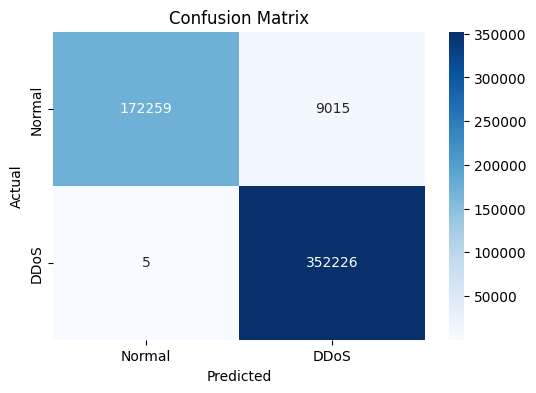

In [344]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Accuracy Over Epochs')

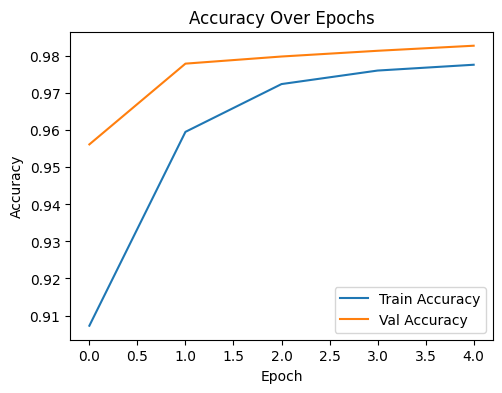

In [346]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm.history['accuracy'], label='Train Accuracy')
plt.plot(lstm.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

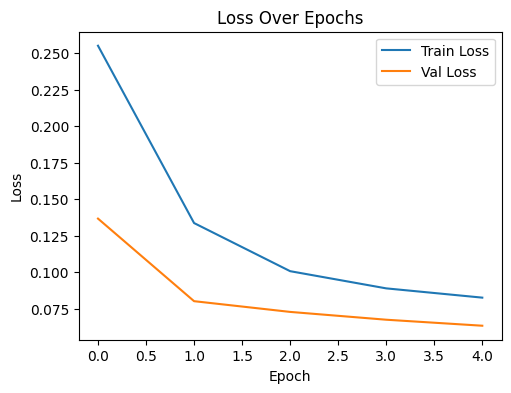

In [348]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(lstm.history['loss'], label='Train Loss')
plt.plot(lstm.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# ROC-AUC curve

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 14s 828us/step
Test ROC-AUC Score: 0.9926


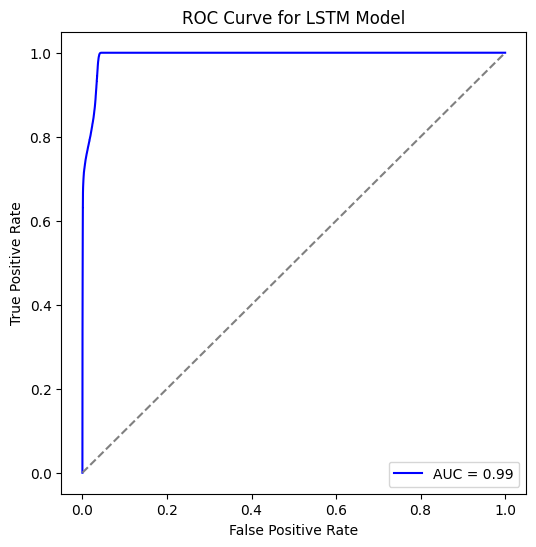

In [351]:
from sklearn.metrics import roc_auc_score, roc_curve
# Generate predictions for ROC-AUC
y_pred_prob = model_lstm.predict(X_test_lstm).ravel()  # Get probabilities, flatten to 1D

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Test ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.legend(loc="lower right")
plt.show()

# 1D-CNN(Convolution Neural Network)

In [356]:
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.regularizers import l2
import numpy as np

# Reshape for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [358]:
model_cnn = Sequential([
    Conv1D(8, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.6),  # Increased dropout
    Flatten(),
    Dense(8, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

C:\Users\shravya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [360]:
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [362]:
cnn = model_cnn.fit(X_train_cnn, y_train, epochs=5, batch_size=128, validation_data=(X_test_cnn, y_test))

Epoch 1/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9084 - loss: 0.2583 - val_accuracy: 0.9733 - val_loss: 0.0949
Epoch 2/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9360 - loss: 0.1876 - val_accuracy: 0.9731 - val_loss: 0.0930
Epoch 3/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9378 - loss: 0.1866 - val_accuracy: 0.9736 - val_loss: 0.0927
Epoch 4/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9376 - loss: 0.1915 - val_accuracy: 0.9748 - val_loss: 0.0937
Epoch 5/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9378 - loss: 0.1877 - val_accuracy: 0.9742 - val_loss: 0.0942


In [364]:
test_loss, test_accuracy = model_cnn.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 13s 757us/step - accuracy: 0.9744 - loss: 0.0910
Test Loss: 0.0942
Test Accuracy: 0.9742


In [366]:
from sklearn.metrics import accuracy_score

y_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 12s 693us/step
Test Accuracy: 97.42%


# Computing Confusion Matrix

In [369]:
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[167545  13729]
 [    20 352211]]


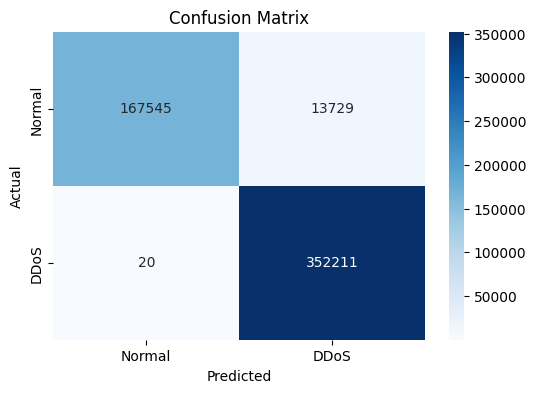

In [371]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Accuracy Over Epochs')

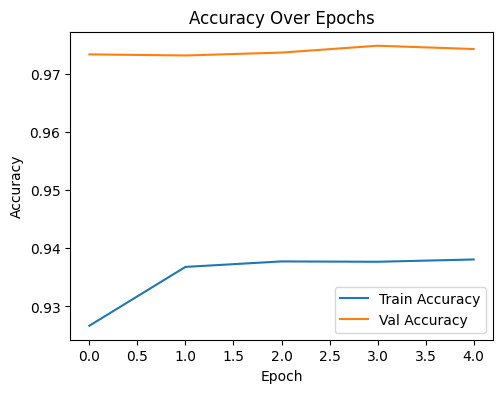

In [373]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn.history['accuracy'], label='Train Accuracy')
plt.plot(cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

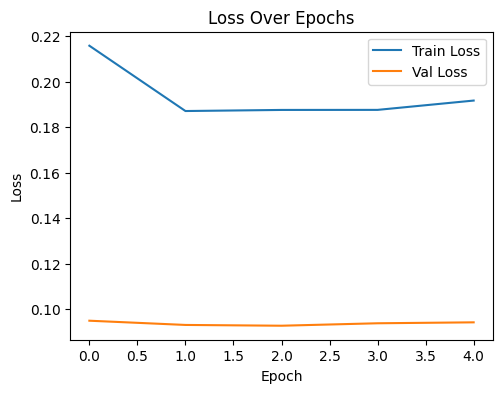

In [375]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(cnn.history['loss'], label='Train Loss')
plt.plot(cnn.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# ROC_AUC Curves

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 12s 732us/step
Test ROC-AUC Score: 0.9937


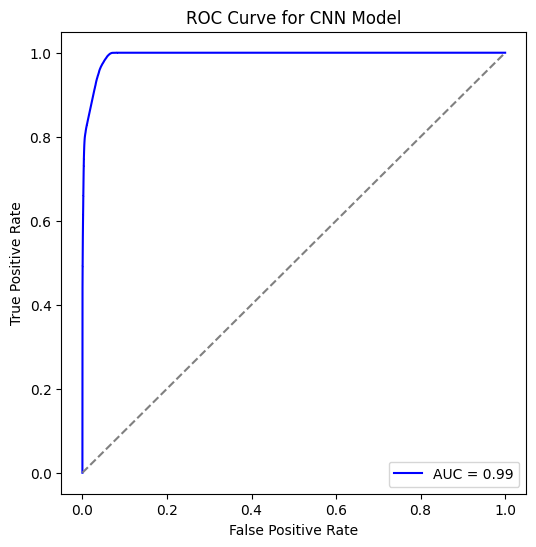

In [378]:
from sklearn.metrics import roc_auc_score, roc_curve
# Generate predictions for ROC-AUC
y_pred_cnn = model_cnn.predict(X_test_cnn).ravel() 

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_cnn)
print(f"Test ROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, _ = roc_curve(y_test, y_pred_cnn)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.show()

# Summarizing all ROC Curves

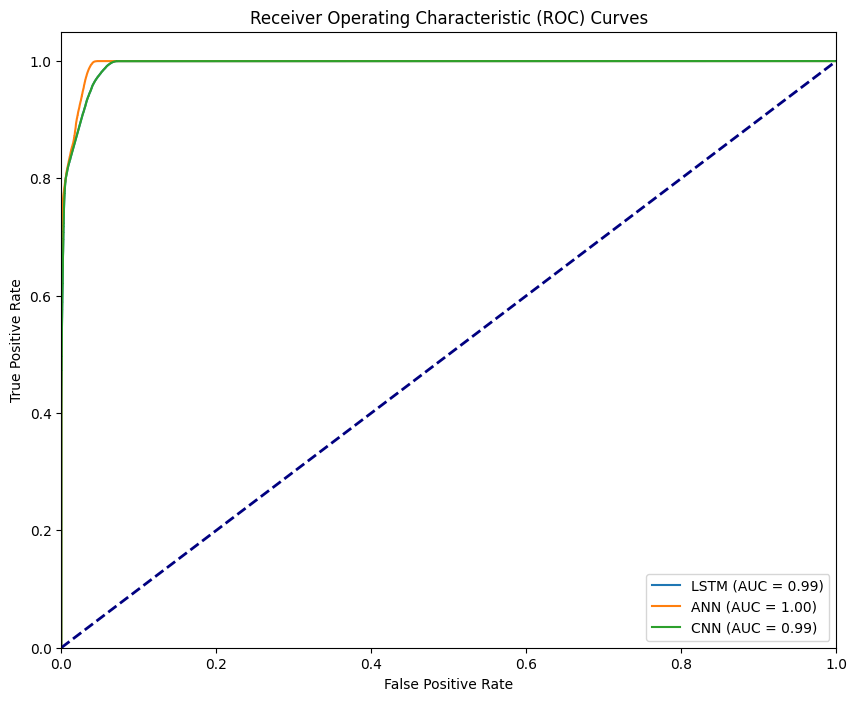

In [385]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and probability predictions for each model:
# y_pred_prob_lstm, y_pred_prob_bilstm, y_pred_prob_ann, y_pred_prob_cnn, svm_probabilities

models = {
    "LSTM": y_pred_prob,
    "ANN": y_pred_ann,
    "CNN": y_pred_cnn,
}

plt.figure(figsize=(10, 8))

for model_name, y_pred_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.show()

In [397]:
import pandas as pd

data = {'Model': ['LSTM','CNN', 'ANN'],
        'Accuracy': [0.9831, 0.9742, 0.9810],  
        'Precision': [0.9752, 0.9623, 0.9720], 
        'Recall': [0.9999, 0.9993, 0.9997]}   

results_df = pd.DataFrame(data)
results_df

,Model,Accuracy,Precision,Recall
0,LSTM,0.9831,0.9752,0.9999
1,CNN,0.9742,0.9623,0.9993
2,ANN,0.9810,0.9720,0.9997


# Displaying all models Accuracy,Precision and Recall

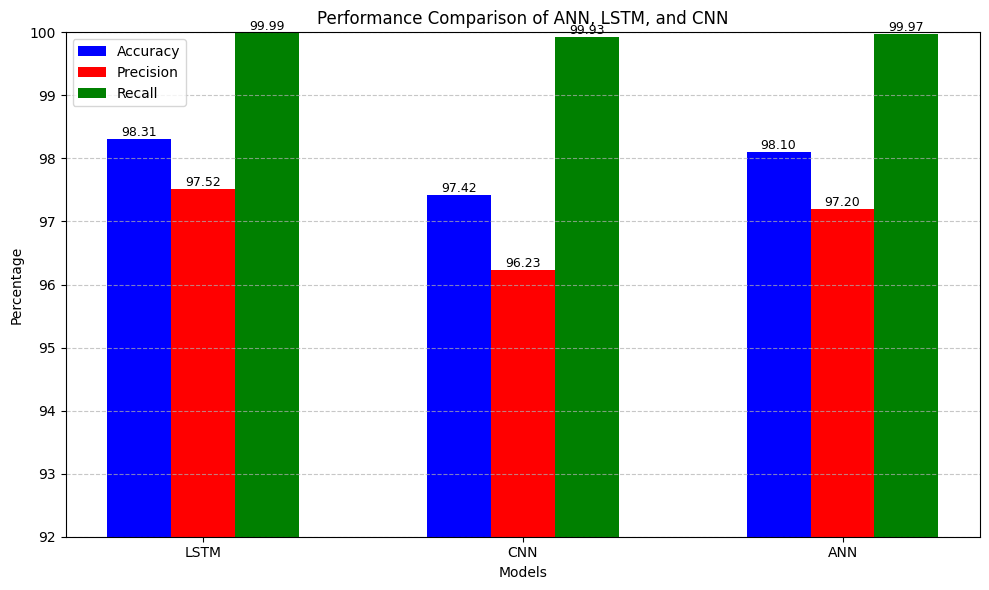

In [400]:
import numpy as np
import matplotlib.pyplot as plt

models = ["LSTM", "CNN", "ANN"]
accuracy = [98.31, 97.42, 98.10]  
precision = [97.52, 96.23, 97.20]  
recall = [99.99, 99.93, 99.97]  

# X-axis positions
x = np.arange(len(models))
width = 0.2  

plt.figure(figsize=(10, 6))  # Increased figure size for better visibility

# Create bars for each metric
bars1 = plt.bar(x - width, accuracy, width, label='Accuracy', color='blue')
bars2 = plt.bar(x, precision, width, label='Precision', color='red')
bars3 = plt.bar(x + width, recall, width, label='Recall', color='green')

# Set labels and title
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Performance Comparison of ANN, LSTM, and CNN")
plt.xticks(x, models)
plt.ylim(92, 100)  # Limit y-axis from 90 to 100

# Add value labels on top of each bar
for bars, values in [(bars1, accuracy), (bars2, precision), (bars3, recall)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{value:.2f}',  # Show 2 decimal places
                 ha='center', va='bottom', fontsize=9, color='black')

# Add legend
plt.legend()

# Optional: Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()